# **Jamboree Business Case**

*Why this case study?*

### From company’s perspective:

  ● Jamboreeis a renowned educational institution that
  has successfully assisted numerous
 students in gaining admission to top colleges abroad. With their proven
 problem-solving methods, they have helped students achieve exceptional scores on
 exams like GMAT, GRE, and SAT with minimal effort.
 ● Tofurther support students, Jamboree has recently introduced a new feature on their
 website. This feature enables students to assess their probability of admission to Ivy
 League colleges, considering the unique perspective of Indian applicants.
 ● Byconducting a thorough analysis, we can assist Jamboree in understanding the crucial
 factors impacting graduate admissions and their interrelationships. Additionally, we can
 provide predictive insights to determine an individual's admission chances based on
 various variables.

### From learner’s perspective:

 ● Solving this business case holds immense importance for aspiring data scientists and
 MLengineers.

 ● Building predictive models using machine learning is widely popular among the data
 scientists/ML engineers. By working through this case study, individuals gain hands-on
 experience and practical skills in the field.

 ● Additionally, it will enhance one's ability to communicate with the stakeholders
 involved in data-related projects and help the organization take better, data-driven
 decisions.

Dataset

● **Serial No**.: This column represents the unique row identifier for each applicant in the
 dataset.

 ● **GREScores**:This column contains the GRE (Graduate Record Examination) scores of
 the applicants, which are measured on a scale of 0 to 340.

 ● **TOEFLScores**: This column includes the TOEFL (Test of English as a Foreign Language)
 scores of the applicants, which are measured on a scale of 0 to 120.

 ● **University Rating**: This column indicates the rating or reputation of the university that
 the applicants are associated with.
 ○ Therating is based on a scale of 0 to 5, with 5 representing the highest rating.

 ● **SOP**:Thiscolumnrepresents the strength of the applicant's statement of purpose,
 rated on a scale of 0 to 5, with 5 indicating a strong and compelling SOP.

 ● **LOR**:Thiscolumn represents the strength of the applicant's letter of recommendation,
 rated on a scale of 0 to 5, with 5 indicating a strong and compelling LOR.

 ● **CGPA**:Thiscolumncontains the undergraduate Grade Point Average (GPA) of the
 applicants, which is measured on a scale of 0 to 10.

 ● **Research**: This column indicates whether the applicant has research experience (1) or
 not (0).

 ● **ChanceofAdmit**: This column represents the estimated probability or chance of
 admission for each applicant, ranging from 0 to 1.


 These columns provide relevant information about the applicants' academic qualifications, test
 scores, university ratings, and other factors that may influence their chances of admission.

**1. Define Problem Statement and perform Exploratory Data Analysis :**

**Problem Statement:**

The dataset provided contains profiles of applicants applying for graduate programs, including variables such as GRE Score, TOEFL Score, University Rating, Statement of Purpose (SOP), Letters of Recommendation (LOR), Undergraduate CGPA, Research Experience, and the Chance of Admission. The goal is to build a predictive model that estimates the likelihood of admission based on these features.


**Objectives**:

1. Predictive Modeling:


*   Develop a model to predict the Chance of Admission using the provided features.
*   Evaluate the model's accuracy and generalizability using appropriate metrics.


2. Feature Analysis:


*   Analyze which features have the most significant impact on the Chance of Admission.
*   Address multicollinearity, missing values, and outliers to improve model reliability.




3. Model Improvement:



*   Optimize the model by tuning hyperparameters and selecting the most impactful features
*   Validate the model assumptions and refine it to enhance predictive performance.


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Import the dataset
data = pd.read_csv('/content/Jamboree_Admission.csv')

In [38]:
# To get the count of rows and columns
data.shape

(500, 9)

In [39]:
# To get Top 10 rows of the dataset
data.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [40]:
# Dropping  the first column which contains "Serial No." as it is irrelevent for prediction
data = data.drop(columns=['Serial No.'])

data.head(10)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [41]:
# To get data type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [42]:
# To get the statistical summary of entire dataset
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


**Key Attributes and Their Ranges:**

**GRE Score:**

***Range***: 290 to 340

***Comment***: The GRE scores range from 290 to 340, indicating a variety of applicants from those who barely meet the cutoff to those with perfect scores.

**TOEFL Score:**

***Range***: 93 to 120

***Comment***: TOEFL scores span from 93 to 120, with higher scores indicating better English proficiency.

**University Rating:**

***Range***: 1 to 5

***Comment***: University ratings range from 1 to 5, with higher numbers representing more prestigious institutions.

**SOP (Statement of Purpose) Strength:**

***Range***: 1.5 to 5

***Comment***: SOP scores vary from 1.5 to 5, showing a wide range in the quality of applicants' statements.

**LOR (Letter of Recommendation) Strength:**

***Range***: 1.0 to 5

***Comment***: LOR scores range from 1.0 to 5, reflecting the varying strengths of applicants' recommendations.

**CGPA**:

***Range***: 6.8 to 10

***Comment***: CGPA scores range from 6.8 to 10, indicating a broad spectrum of academic performance among applicants.

**Research Experience:**

***Range***: 0 to 1

***Comment***: Research experience is binary, with 0 indicating no research experience and 1 indicating the presence of research experience.

**Chance of Admit:**

***Range***: 0.34 to 0.97

***Comment***: The chance of admission ranges from 0.34 to 0.97, showing the model’s prediction of the likelihood of acceptance for each applicant.

**Univariate Analysis**

<ipython-input-43-a6427ee77a66>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Chance of Admit '], shade=True)


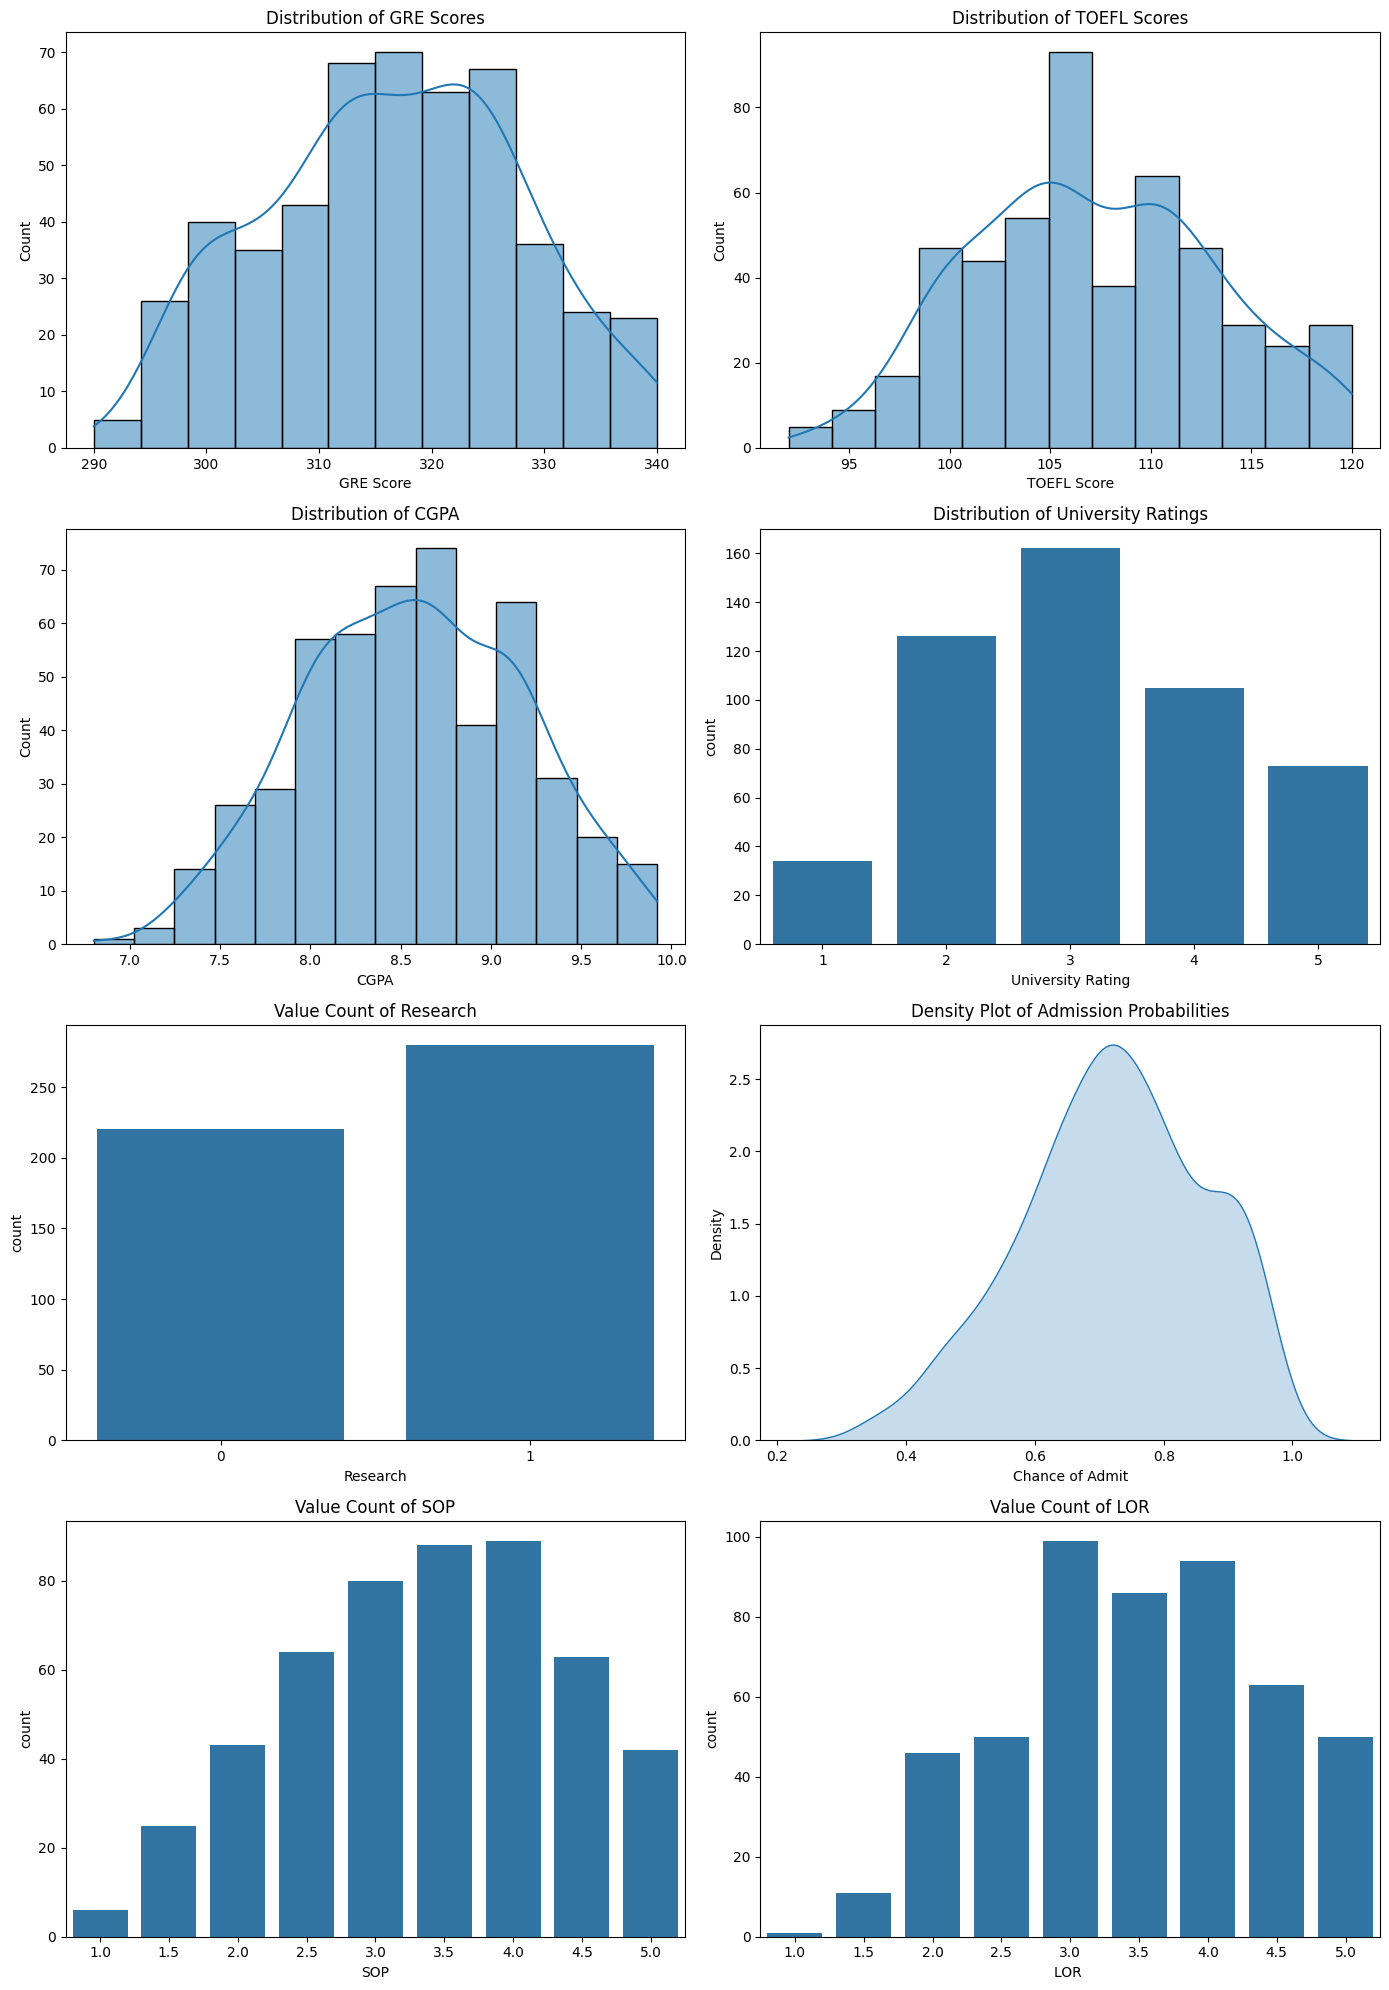

In [43]:
# Univariate Analysis - Histograms, Countplots, kdeplots
plt.figure(figsize=(14, 20))
plt.subplot(4, 2, 1)
sns.histplot(data['GRE Score'], kde=True)
plt.title('Distribution of GRE Scores')
plt.subplot(4, 2, 2)
sns.histplot(data['TOEFL Score'], kde=True)
plt.title('Distribution of TOEFL Scores')
plt.subplot(4, 2, 3)
sns.histplot(data['CGPA'], kde=True)
plt.title('Distribution of CGPA')
plt.subplot(4, 2, 4)
sns.countplot(x='University Rating', data=data)
plt.title('Distribution of University Ratings')
plt.subplot(4, 2, 5)
sns.countplot(x='Research', data=data)
plt.title('Value Count of Research')
plt.subplot(4, 2, 6)
sns.kdeplot(data['Chance of Admit '], shade=True)
plt.title('Density Plot of Admission Probabilities')
plt.xlabel('Chance of Admit')
plt.ylabel('Density')
plt.subplot(4,2,7)
sns.countplot(x='SOP', data=data)
plt.title('Value Count of SOP')
plt.subplot(4,2,8)
sns.countplot(x='LOR ', data=data)
plt.title('Value Count of LOR')

plt.tight_layout()
plt.show()

**Bivariate Analysis**

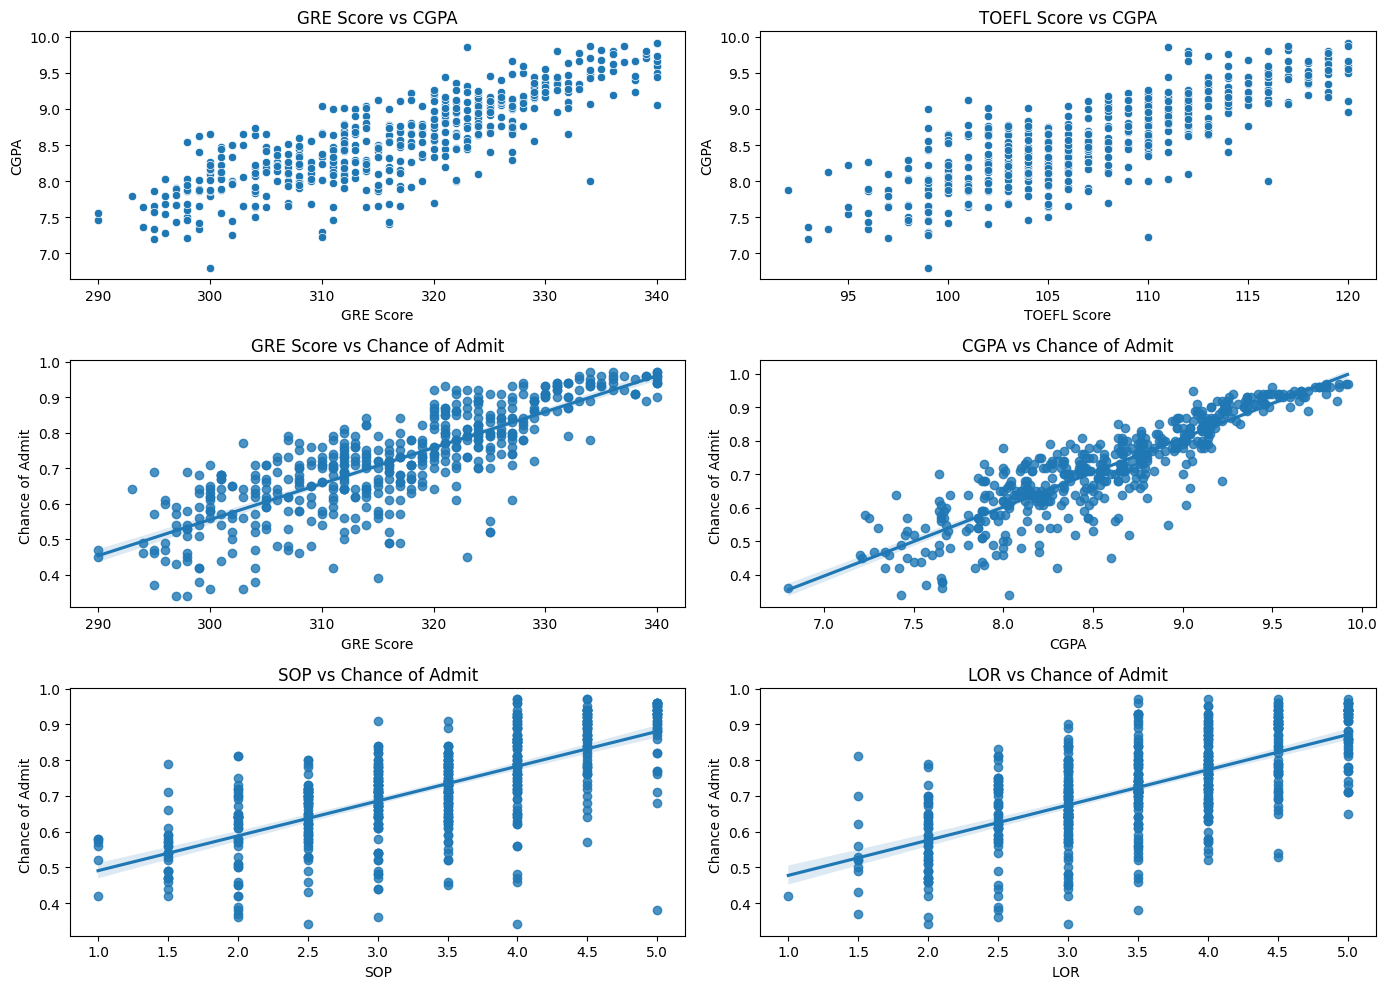

In [44]:
# Bivariate Analysis
plt.figure(figsize=(14, 10))
plt.subplot(3, 2, 1)
sns.scatterplot(x='GRE Score', y='CGPA', data=data)
plt.title('GRE Score vs CGPA')
plt.subplot(3, 2, 2)
sns.scatterplot(x='TOEFL Score', y='CGPA', data=data)
plt.title('TOEFL Score vs CGPA')
plt.subplot(3, 2, 3)
sns.regplot(x='GRE Score', y='Chance of Admit ', data=data)
plt.title('GRE Score vs Chance of Admit')
plt.subplot(3, 2, 4)
sns.regplot(x='CGPA', y='Chance of Admit ', data=data)
plt.title('CGPA vs Chance of Admit')
plt.subplot(3, 2, 5)
sns.regplot(x='SOP', y='Chance of Admit ', data=data)
plt.title('SOP vs Chance of Admit')
plt.subplot(3, 2, 6)
sns.regplot(x='LOR ', y='Chance of Admit ', data=data)
plt.title('LOR vs Chance of Admit')


plt.tight_layout()
plt.show()

**Initial Insights :**

*Distribution Insights:*


1.   Most students have GRE and TOEFL scores concentrated around certain ranges, indicating a possible trend in the score requirements of applicants.
2.   The majority of CGPA values are clustered in the higher range, possibly suggesting a competitive pool of candidates.







*Relationship Insights:*


1.   There appears to be a positive correlation between GRE/TOEFL scores and CGPA, suggesting that higher test scores might be associated with higher academic performance.
2.   Both GRE scores and CGPA show a strong positive relationship with the chance of admission, indicating that these factors are significant predictors.




### **2. Data Preprocessing**

In [45]:
# Check for duplicates
duplicates = data.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicate records: {num_duplicates}")

Number of duplicate records: 0


In [46]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [47]:
# Check for Outliers
def detect_outliers(data):
    outliers = []
    threshold = 1.5
    for col in data.select_dtypes(include=[np.number]).columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        outliers_col = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outliers.append(outliers_col)
        print(f"Outliers detected in column {col}:\n{outliers_col}")
    return pd.concat(outliers).drop_duplicates()

outliers_detected = detect_outliers(data)

# Optionally, remove outliers
data = data[~data.index.isin(outliers_detected.index)]
print(f"Number of records after removing outliers: {data.shape[0]}")


Outliers detected in column GRE Score:
Empty DataFrame
Columns: [GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
Index: []
Outliers detected in column TOEFL Score:
Empty DataFrame
Columns: [GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
Index: []
Outliers detected in column University Rating:
Empty DataFrame
Columns: [GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
Index: []
Outliers detected in column SOP:
Empty DataFrame
Columns: [GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
Index: []
Outliers detected in column LOR :
     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
347        299           94                  1  1.0   1.0  7.34         0   

     Chance of Admit   
347              0.42  
Outliers detected in column CGPA:
Empty DataFrame
Columns: [GRE Score, TOEFL Score, University Rating, SOP,

In [48]:
# Compute the correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)

                   GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.824360           0.631514  0.614286   
TOEFL Score         0.824360     1.000000           0.645349  0.643806   
University Rating   0.631514     0.645349           1.000000  0.727569   
SOP                 0.614286     0.643806           0.727569  1.000000   
LOR                 0.518457     0.533263           0.603831  0.659858   
CGPA                0.823739     0.807282           0.701979  0.711175   
Research            0.558932     0.461071           0.422304  0.406490   
Chance of Admit     0.807594     0.788128           0.688621  0.690654   

                       LOR       CGPA  Research  Chance of Admit   
GRE Score          0.518457  0.823739  0.558932          0.807594  
TOEFL Score        0.533263  0.807282  0.461071          0.788128  
University Rating  0.603831  0.701979  0.422304          0.688621  
SOP                0.659858  0.711175  0.406490          0.69

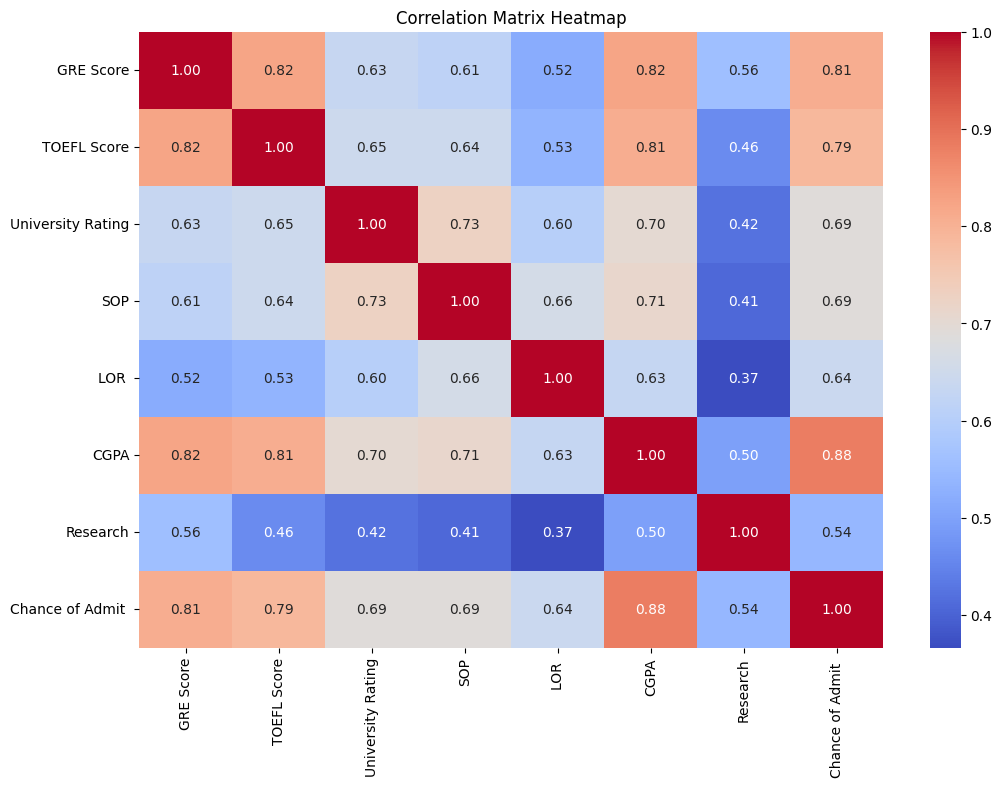

In [49]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [50]:
# Identify features with correlation > 0.90
threshold = 0.90
high_correlation_pairs = correlation_matrix[(correlation_matrix > threshold) & (correlation_matrix != 1)].stack().index

# Print highly correlated pairs
print("Highly correlated pairs (correlation > 0.90):")
for pair in high_correlation_pairs:
    print(pair)

# Drop one feature from each pair of highly correlated features
def drop_highly_correlated_features(data, correlation_matrix, threshold):
    columns_to_drop = set()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                column_name = correlation_matrix.columns[i]
                columns_to_drop.add(column_name)
    return data.drop(columns=columns_to_drop)

# Drop the features
data = drop_highly_correlated_features(data, correlation_matrix, threshold)
print(f"Remaining features after dropping highly correlated ones: {data.columns.tolist()}")


Highly correlated pairs (correlation > 0.90):
Remaining features after dropping highly correlated ones: ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


**Data preparation for modeling**

**Step 1: Encode Categorical Variables**

In this dataset, the categorical variable - Research needs to be encoded. We'll use binary encoding (0 and 1), but since it's already in numeric form, no changes are required here.

**Step 2: Perform Train-Test Split**

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Define the feature matrix (X) and the target vector (y)
X = data.drop(columns=['Chance of Admit '])
y = data['Chance of Admit ']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform data normalization/standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant term to the feature matrix for the intercept
X_train_scaled_with_const = sm.add_constant(X_train_scaled)
X_test_scaled_with_const = sm.add_constant(X_test_scaled)



**Summary of Data Preparation Steps**

**Encoding**: No additional encoding needed for the Research variable as it's already numeric.

**Train-Test Split**: Splits the data into training and testing sets.

**Normalization/Standardization:** Ensures that all features have a similar scale, which is crucial for models that rely on distance measures, like linear regression or logistic regression.

Data is now prepared and ready for modeling

### **3. Model building**

Step 1: Create and Fit the Initial Model

In [52]:
# Build the initial Linear Regression model
model = sm.OLS(y_train, X_train_scaled_with_const).fit()
print(model.summary())

# Extract p-values and drop columns with p-value > 0.05
p_values = model.pvalues
significant_features = p_values[p_values <= 0.05].index.tolist()

# Ensure the constant term is included in the significant features list
significant_features_with_const = ['const'] + [feature for feature in X_train.columns if feature in significant_features]
print("Significant features with constant:", significant_features_with_const)

# Filter the feature matrix to include only significant features
significant_features_indices = [i for i, feature in enumerate(['const'] + X_train.columns.tolist()) if feature in significant_features_with_const]
X_train_scaled_significant = X_train_scaled_with_const[:, significant_features_indices]

# Print the shape of the filtered feature matrix
print("Shape of X_train_scaled_significant:", X_train_scaled_significant.shape)

# Fit the new model with significant features only
model_significant = sm.OLS(y_train, X_train_scaled_significant).fit()

# Print the summary of the new model
print(model_significant.summary())

# Display new coefficients with column names
coefficients_significant = pd.DataFrame({
    'Feature': significant_features_with_const,
    'Coefficient': model_significant.params
})
print(coefficients_significant)



                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     264.1
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          1.67e-143
Time:                        15:31:29   Log-Likelihood:                 566.95
No. Observations:                 397   AIC:                            -1118.
Df Residuals:                     389   BIC:                            -1086.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7298      0.003    248.115      0.0

Step 2: Comment on the Model Statistics

The model.summary() output provides a wealth of information, including:



*   R-squared: Indicates the proportion of variance in the dependent variable explained by the independent variables. Higher values indicate a better fit.
*   Adj. R-squared: Adjusted for the number of predictors, providing a more accurate measure when comparing models with different numbers of predictors.


*   F-statistic: Tests the overall significance of the model. A low p-value (<0.05) indicates the model is statistically significant.
*   Coefficients: Estimates for the regression equation.

*   P-values: Tests the null hypothesis that a coefficient is equal to zero (no effect). A p-value <0.05 indicates statistical significance.
*   Standard Errors: Measures the accuracy of the coefficient estimates.

**Drop columns with p-value > 0.05 (if any) and re-train the model.**

In [53]:
# Extract p-values and drop columns with p-value > 0.05
p_values = model.pvalues
significant_features = p_values[p_values <= 0.05].index.tolist()

# Ensure the constant term is included in the significant features list
significant_features_with_const = ['const'] + [feature for feature in X_train.columns if feature in significant_features]
print("Significant features with constant:", significant_features_with_const)

# Filter the feature matrix to include only significant features
significant_features_indices = [i for i, feature in enumerate(['const'] + X_train.columns.tolist()) if feature in significant_features_with_const]
X_train_scaled_significant = X_train_scaled_with_const[:, significant_features_indices]

# Print the shape of the filtered feature matrix
print("Shape of X_train_scaled_significant:", X_train_scaled_significant.shape)

# Fit the new model with significant features only
model_significant = sm.OLS(y_train, X_train_scaled_significant).fit()

# Print the summary of the new model
print(model_significant.summary())

# Display new coefficients with column names
coefficients_significant = pd.DataFrame({
    'Feature': significant_features_with_const,
    'Coefficient': model_significant.params
})
print(coefficients_significant)


Significant features with constant: ['const']
Shape of X_train_scaled_significant: (397, 1)
                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 07 Nov 2024   Prob (F-statistic):                nan
Time:                        15:31:38   Log-Likelihood:                 219.67
No. Observations:                 397   AIC:                            -437.3
Df Residuals:                     396   BIC:                            -433.4
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

### **4. Testing the assumptions of the linear regression model**

a. Multicollinearity check by VIF score

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Multicollinearity check by VIF score
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Calculate initial VIF scores
X_train_df = pd.DataFrame(X_train_scaled_with_const, columns=['const'] + X_train.columns.tolist(), index=X_train.index)
X_test_df = pd.DataFrame(X_test_scaled_with_const, columns=['const'] + X_train.columns.tolist(), index=X_test.index)
vif_data = calculate_vif(X_train_df)
print(vif_data)

# Drop variables one-by-one till none has a VIF > 5
while vif_data['VIF'].max() > 5:
    max_vif_feature = vif_data.loc[vif_data['VIF'].idxmax(), 'Feature']
    X_train_df = X_train_df.drop(columns=[max_vif_feature])
    X_test_df = X_test_df.drop(columns=[max_vif_feature])
    vif_data = calculate_vif(X_train_df)
    print(vif_data)

# Fit the final model with reduced features
final_features = X_train_df.columns.tolist()
model_final = sm.OLS(y_train, X_train_df).fit()
print(model_final.summary())

             Feature       VIF
0              const  1.000000
1          GRE Score  4.344912
2        TOEFL Score  3.646516
3  University Rating  2.699182
4                SOP  2.932950
5               LOR   2.114230
6               CGPA  4.982471
7           Research  1.505431
                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     264.1
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          1.67e-143
Time:                        15:31:42   Log-Likelihood:                 566.95
No. Observations:                 397   AIC:                            -1118.
Df Residuals:                     389   BIC:                            -1086.
Df Model:                           7                                         
Covariance

 b. Mean of residuals should be close to zero

In [55]:
# Calculate residuals
residuals = model_significant.resid

# Mean of residuals
mean_residuals = model_final.resid.mean()
print(f"Mean of residuals: {mean_residuals}")



Mean of residuals: -5.44624519006925e-16


c. Linearity of variables

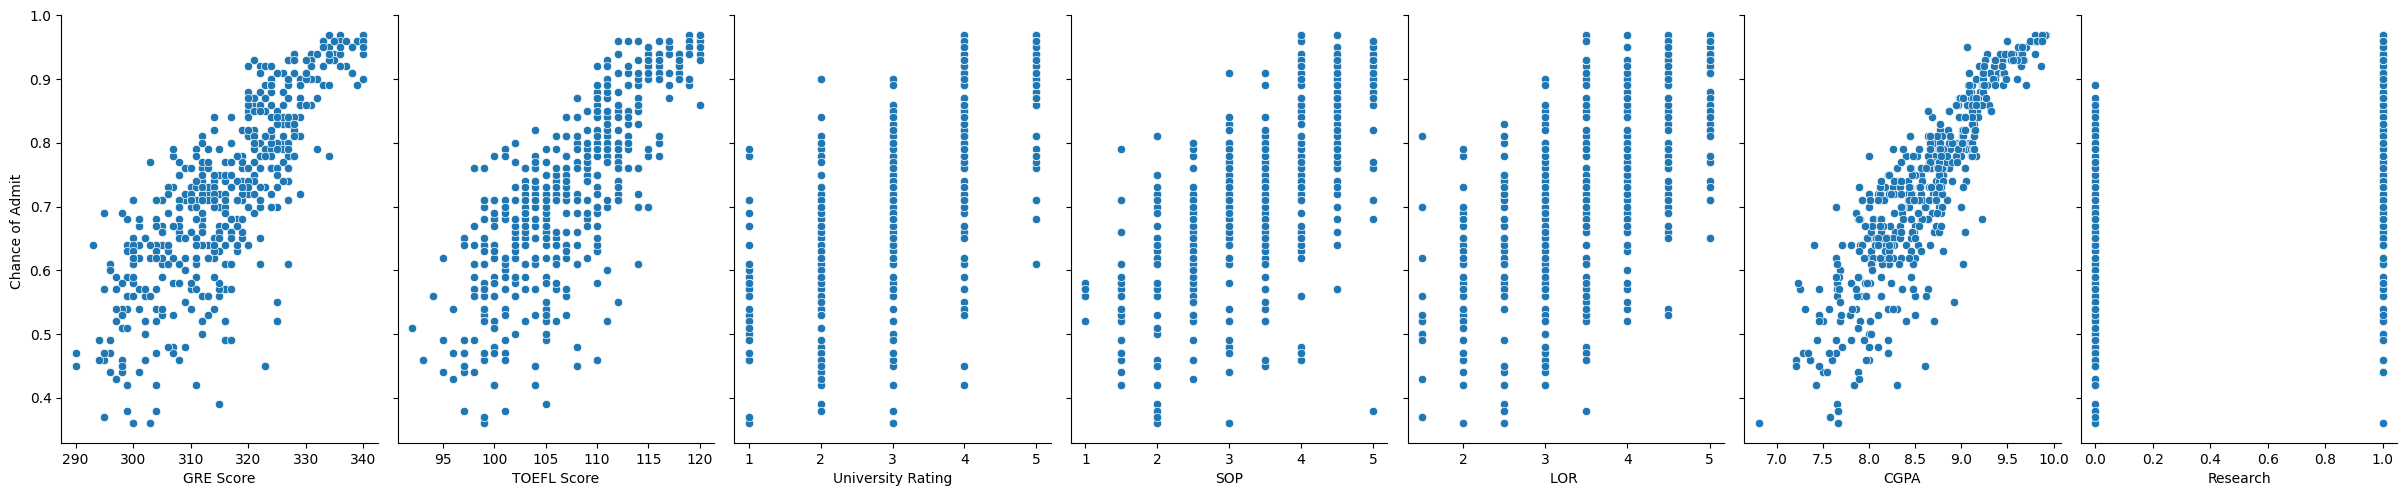

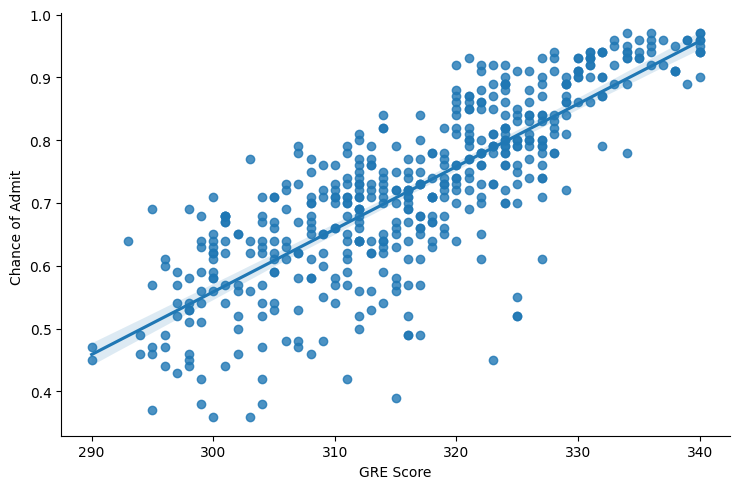

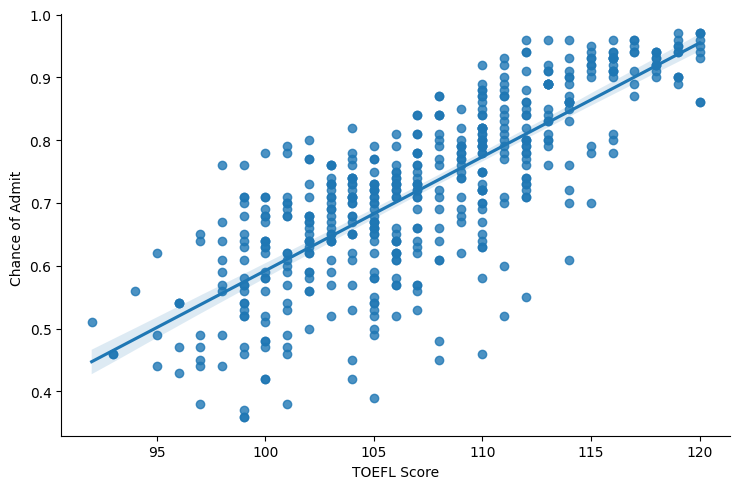

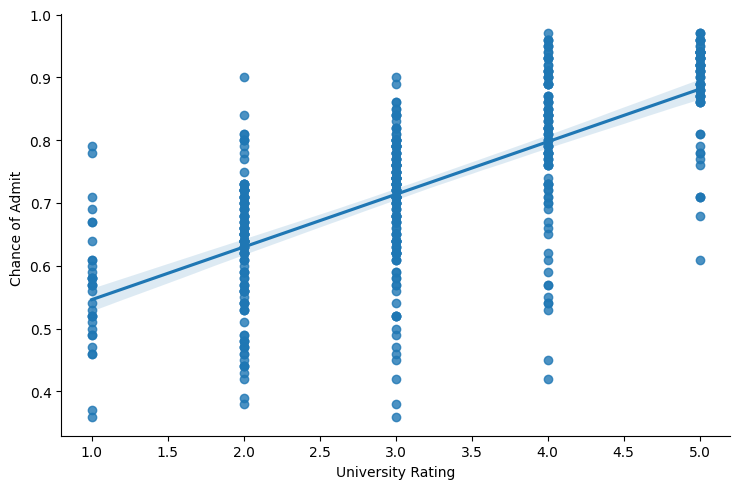

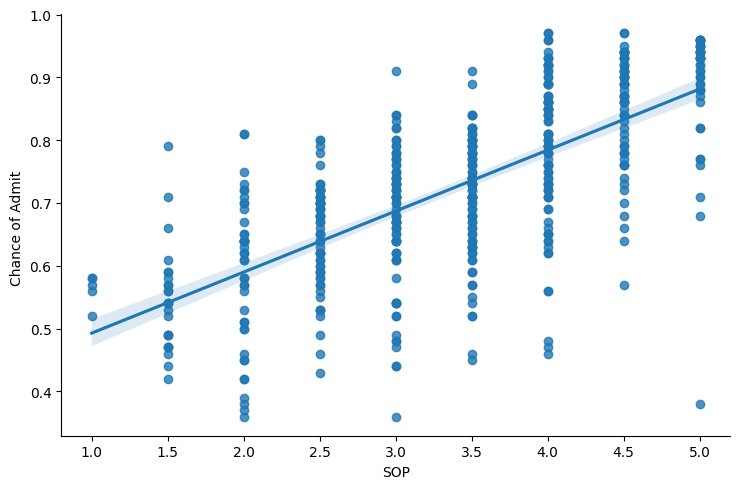

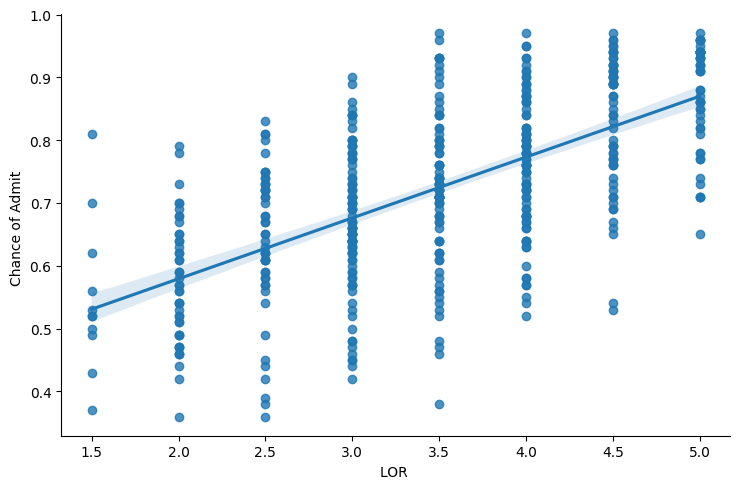

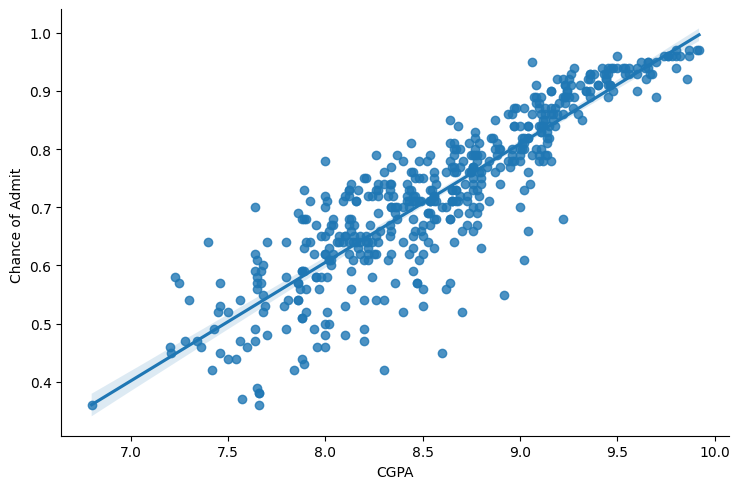

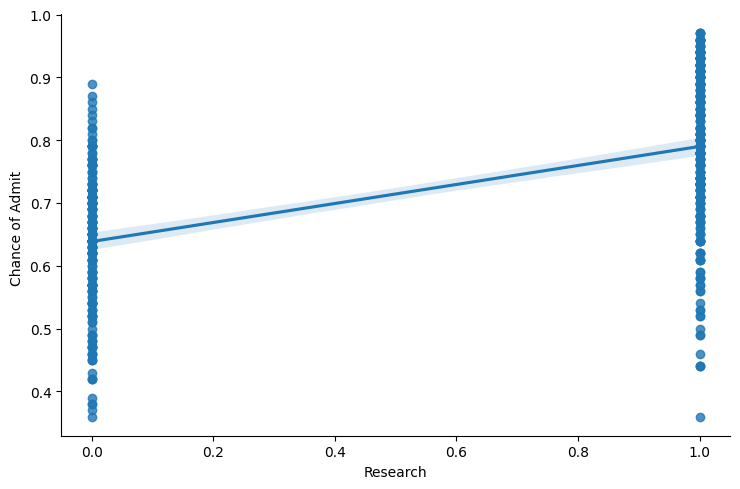

Pearson correlation matrix:
                   GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.824360           0.631514  0.614286   
TOEFL Score         0.824360     1.000000           0.645349  0.643806   
University Rating   0.631514     0.645349           1.000000  0.727569   
SOP                 0.614286     0.643806           0.727569  1.000000   
LOR                 0.518457     0.533263           0.603831  0.659858   
CGPA                0.823739     0.807282           0.701979  0.711175   
Research            0.558932     0.461071           0.422304  0.406490   
Chance of Admit     0.807594     0.788128           0.688621  0.690654   

                       LOR       CGPA  Research  Chance of Admit   
GRE Score          0.518457  0.823739  0.558932          0.807594  
TOEFL Score        0.533263  0.807282  0.461071          0.788128  
University Rating  0.603831  0.701979  0.422304          0.688621  
SOP                0.659858  0.71

In [56]:
# Scatter plots
sns.pairplot(data, x_vars=X_train.columns, y_vars='Chance of Admit ', height=5, aspect=0.7)
plt.show()

# Regression plots
for col in X_train.columns:
    sns.lmplot(x=col, y='Chance of Admit ', data=data, aspect=1.5)
plt.show()

# Pearson correlation
correlation_matrix = data.corr()
print("Pearson correlation matrix:")
print(correlation_matrix)




d. Test for Homoscedasticity

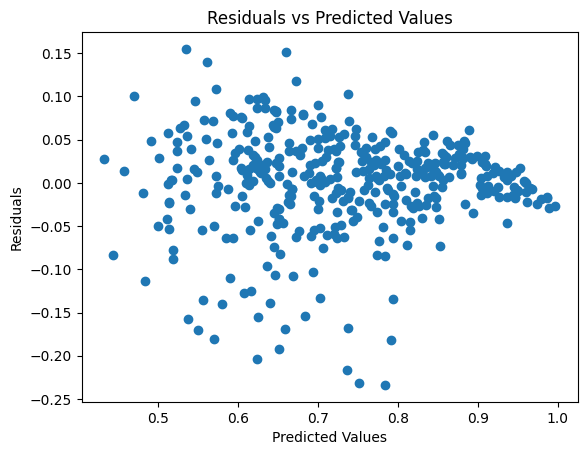

[('F statistic', 1.0200745515784388), ('p-value', 0.44547168193266157)]


In [57]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# Predicted values
predicted_values = model_final.predict(X_train_df)

# Scatter plot of residuals vs predicted values
plt.scatter(predicted_values, model_final.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Perform the Goldfeld-Quandt test
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model_final.resid, model_final.model.exog)
print(lzip(name, test))



e. Normality of Residuals

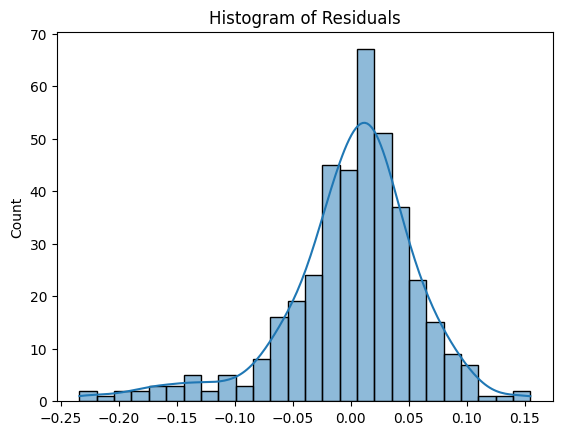

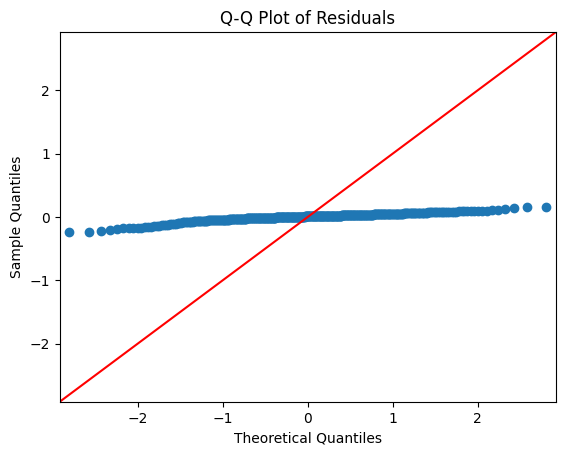

In [58]:
import scipy.stats as stats

# Histogram of residuals
sns.histplot(model_final.resid, kde=True)
plt.title('Histogram of Residuals')
plt.show()

# Q-Q plot
sm.qqplot(model_final.resid, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()



### **5. Model performance evaluation**

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predicted values for the test set
X_test_final = X_test_df[final_features]
y_pred = model_final.predict(X_test_final)

# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Square Error (RMSE): {rmse}")

# R² score
r2 = r2_score(y_test, y_pred)
print(f"R² score: {r2}")

# Adjusted R² score
n = X_test.shape[0]
p = len(final_features) - 1
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print(f"Adjusted R² score: {adjusted_r2}")



Mean Absolute Error (MAE): 0.04364046935062818
Root Mean Square Error (RMSE): 0.06060791941835908
R² score: 0.795858171507422
Adjusted R² score: 0.7803256410786389


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Summary of Model Performance**

**Mean Absolute Error (MAE):** Provides the average absolute difference between the predicted values and the actual values. Lower values indicate better accuracy.

**Root Mean Square Error (RMSE):** Gives the square root of the average squared differences between the predicted values and the actual values. It penalizes larger errors more than MAE. Lower values are better.

**R-squared value (R²)**: Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. Values closer to 1 indicate a better fit.

**Adjusted R-squared value:** Adjusts the R² value based on the number of predictors and observations, providing a more accurate measure when comparing models with different numbers of predictors.

### **6 . Actionable Insights & Recommendations**

**Actionable Insights**

**Significant Predictors:**

GRE Score and CGPA are strong predictors of the Chance of Admit. High scores in these areas correlate strongly with higher admission probabilities.

TOEFL Score, University Rating, SOP, LOR, and Research also positively influence the chance of admission but to varying extents.

**Importance of Research:**

Having research experience (coded as 1 for Yes and 0 for No) significantly boosts the likelihood of admission. Encouraging applicants to gain research experience could be beneficial.

**University Ratings:**

Higher ratings of the universities (University Rating) are associated with higher chances of admission, suggesting that applicants should aim for higher-rated institutions if possible.

**Statement of Purpose (SOP) and Letter of Recommendation (LOR):**

SOP and LOR scores play a notable role in the admission process. Strong, well-articulated essays and solid recommendations from credible sources can improve admission chances.

**Recommendations:**
Enhance Profile on Key Predictors:

**GRE Preparation:** Invest time in preparing for the GRE to achieve a high score. Utilize study resources, take practice tests, and consider professional prep courses.

**Academic Performance:** Maintain a high CGPA through consistent performance in coursework and exams.

**Gain Research Experience:**

Engage in research projects during undergraduate studies. Seek opportunities to assist professors, join research clubs, or participate in independent study projects.

**Optimize Application Materials:**

**SOP**: Write a compelling and concise Statement of Purpose. Tailor it to highlight your strengths, achievements, and reasons for applying to specific programs.

**LOR**: Obtain strong letters of recommendation from individuals who know you well academically and professionally. Provide your recommenders with sufficient information and time to write detailed and personalized letters.

**Targeting Right Institutions:**

Apply to a mix of universities with different ratings to maximize your chances of admission. Include a few reach schools, but also apply to safety and match schools.

**Seek Professional Guidance:**

Consider consulting with educational advisors or mentors who can provide personalized advice and feedback on your application strategy.

**Continuous Learning:**

Stay updated with trends and requirements in your field of interest. Participate in relevant workshops, seminars, and conferences to enhance your knowledge and network.